In [114]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.stem.wordnet import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords 
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import matplotlib as mpl



# Any results you write to the current directory are saved as output.

**Step 1: Data Cleaning and exploration**


* Taking kaggle's Jigsaw toxic comment classification dataset as input.
* Filling missing values with "no comment" 

In [115]:
traindf = pd.read_csv("train.csv").fillna("nocomment")

Generating descriptive statistics about the dataset

In [116]:
traindf.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Displaying first ten rows of the dataset

Dropping the "id" column since it is an irrelevant feature.

In [117]:
traindf = traindf.drop(['id'], axis=1)

Shape gives the dimension of the dataset in format (number of rows, number of columns)

In [118]:
traindf.shape

(159571, 7)

In [119]:
traindf.head(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


We extract output labels from the dataset

In [120]:
newPredictionLabel = traindf.drop(['comment_text'], axis=1)

In [121]:
toxicPrediction = newPredictionLabel['toxic']

In [124]:
def expandContractions(inputString):  #code to expand contractions
    for contraction in contractions.keys():
        inputString = inputString.replace(contraction, contractions[contraction])
       # print(inputString)
    return inputString

def removeEndline(inputString):  #code to remove end line characters
    newString = re.sub(r'\n', " ", inputString)
    return newString

def removeSpecialCharacters(inputString): #code to remove special characters
    newString = re.sub(r'\W+', ' ', inputString)
    return newString
def removeMultipleSpaces(inputString): #code to remove multiple spaces
    newString = re.sub(r' +', " ", inputString)
    return newString

def toLowerCase(inputString): #code to convert text into lowercase
    newString = inputString.lower()
    return newString

def removeNumbers(inputString): #code to remove numbers
    newString = re.sub("\d+", "", inputString)
    return newString
def generateLemma(inputString): #code to lemmatize text
    nlp = spacy.load('en', disable=['parser', 'ner'])
    doc = nlp(inputString)
    newString = " ".join([token.lemma_ for token in doc])
    return newString

def removeStopWords(inputString): #code for removal of stop words
    tokenized_words = inputString.split(" ")
    minusStopwords = [word for word in tokenized_words if word not in stopwords]
    newString = " ".join(minusStopwords)
    return newString
def removeEmptyStringsInList(list1): 
    if "" in list1:
        list1.remove("")
    return list1

In [128]:
traindf['comment_text'] = traindf['comment_text'].apply(removeNumbers)

In [129]:
traindf['comment_text'] = traindf['comment_text'].apply(toLowerCase)

In [130]:
traindf['comment_text'] = traindf['comment_text'].apply(expandContractions)

In [131]:
traindf['comment_text'] = traindf['comment_text'].apply(removeEndline)

In [132]:
traindf['comment_text'] = traindf['comment_text'].apply(removeSpecialCharacters)

In [133]:
traindf['comment_text'] = traindf['comment_text'].apply(removeMultipleSpaces)

In [134]:
traindf.to_csv("cleaned_data.csv")  

In [135]:
allComment = ""
for comment in traindf['comment_text']:
    allComment += comment + " "

In [136]:
allWords = allComment.split(" ")
print("total number of words is",len(list(set(allWords))))

total number of words is 177301


In [137]:
indiComment = traindf['comment_text'].values

## Word Cloud of offensive words

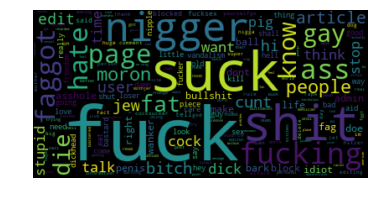

In [149]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(stopwords=stopwords, collocations=False,background_color='black').generate(allToxicComments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

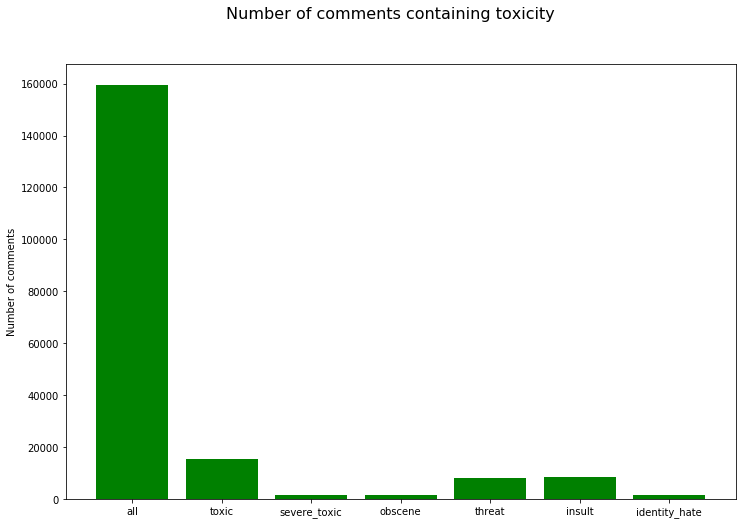

In [150]:
features = ['all','toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate']

comments_count = [
    traindf.shape[0],   
toxicdf.shape[0],
severe_toxicdf.shape[0],
threatdf.shape[0],
insultdf.shape[0],
obscenedf.shape[0],
identity_hatedf.shape[0]
]



fig = plt.figure(figsize=(12,8))
fig.suptitle("Number of comments containing toxicity", fontsize=16)

plt.bar(features, comments_count, color ='green')
plt.ylabel("Number of comments")
pass

In [151]:
toxic_label = traindf['toxic']
severe_toxic_label = traindf['severe_toxic']
obscene_label = traindf['obscene']
threat_label = traindf['threat']
insult_label = traindf['insult']
identity_hate_label = traindf['identity_hate']

In [152]:
traindf = traindf.drop(["comment_length","unique_word_length"], axis =1)


In [153]:
traindf

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,aww he matches this background colour i am see...,0,0,0,0,0,0
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,more i cannot make any real suggestions on im...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,and for the second time of asking when your v...,0,0,0,0,0,0
159567,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0


# LSTM with maxpooling

In [154]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM,Input
from keras.layers import Embedding, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model


#### setting vocabulary size to 25k.
#### Max length of a comment is set to 100
#### Building a tokenizer to allocate each feature a number

In [155]:
vocab_size = 25000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(list(indiComment))

In [156]:
newPredictionLabel = traindf.drop(["comment_text"], axis =1)


In [157]:
list_tokenized_train = tokenizer.texts_to_sequences(indiComment)
X_train = pad_sequences(list_tokenized_train, maxlen=max_length)

##### Spliting dataset into training and validation dataset

In [158]:
x_train, x_val, y_train, y_val = train_test_split(X_train, newPredictionLabel, test_size =0.1, random_state =123 )

In [159]:
y_train.shape

(143613, 6)

### Defining LSTM model
#### Layers: Embedding layer, Bi-directional LSTM, A 1D max pooling function to reduce LSTM output
####  Final dense layer has 6 nodes, which is the number of output labels


In [166]:
def get_model():
    embed_size = 128
    inp = Input(shape=(max_length, ))
    x = Embedding(vocab_size, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


model = get_model()
batch_size =  128
epochs = 5

In [167]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [168]:
RocAuc = RocAucEvaluation(validation_data=(x_val, y_val), interval=1)


## Running the model over 5 epochs

In [169]:

model.fit(x_train,y_train , batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[RocAuc])

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 197s 1ms/step - loss: 0.1423 - accuracy: 0.9607 - val_loss: 0.0507 - val_accuracy: 0.9821

 ROC-AUC - epoch: 1 - score: 0.969025 

Epoch 2/5
143613/143613 [==============================] - 194s 1ms/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.0455 - val_accuracy: 0.9836

 ROC-AUC - epoch: 2 - score: 0.974286 

Epoch 3/5
143613/143613 [==============================] - 194s 1ms/step - loss: 0.0450 - accuracy: 0.9831 - val_loss: 0.0458 - val_accuracy: 0.9836

 ROC-AUC - epoch: 3 - score: 0.974598 

Epoch 4/5
143613/143613 [==============================] - 195s 1ms/step - loss: 0.0416 - accuracy: 0.9843 - val_loss: 0.0468 - val_accuracy: 0.9837

 ROC-AUC - epoch: 4 - score: 0.974688 

Epoch 5/5
143613/143613 [==============================] - 194s 1ms/step - loss: 0.0389 - accuracy: 0.9852 - val_loss: 0.0482 - val_accuracy: 0.9833

 ROC-AUC - epoch: 5 - score: 0.974163 
